<a href="https://colab.research.google.com/github/RabihSouiden/Ciencias-de-a-computacion/blob/main/Reporte__Delitos_sexuales_Polic_a_Nacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos pandas-profiling

In [ ]:
 pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

# Extraemos los datos

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('Reporte__Delitos_sexuales_Polic_a_Nacional.csv')
df = df.drop_duplicates()
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'])
df

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,delito
0,CAQUETÁ,SOLANO,18756000.0,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS
1,BOLÍVAR,CARTAGENA (CT),13001000.0,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADOLECENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
2,HUILA,LA PLATA,41396000.0,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
3,SANTANDER,PIEDECUESTA,68547000.0,CONTUNDENTES,2010-01-01,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
4,META,VILLAVICENCIO (CT),50001000.0,CONTUNDENTES,2010-01-01,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
...,...,...,...,...,...,...,...,...,...
252329,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-02-23,FEMENINO,MENORES,1,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...
252330,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-07-24,MASCULINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS
252331,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-01-09,FEMENINO,ADOLESCENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO
252332,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-09-14,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS


# Generamos el Reporte para explorar los datos

In [ ]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Punto 1
1.	¿Cuáles han sido los departamentos (TOP 3) más afectados a nivel histórico y en el último año?

Realizamos un filtrado sobre el ultimo año 2021
Se realiza un group by por departamento que no utilice indices nuevos, y nos sume la columna cantidad, la cual da la cantidad de delitps cometidos, luego organizamos los valores de cantidad de manera descendente y mostramos los 3 primeros datos

In [ ]:
a = df
a['AÑO'] = pd.DatetimeIndex(df['FECHA HECHO']).year
cond1 = a['AÑO']== 2021
a = a[cond1]
a = a.groupby('DEPARTAMENTO', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
a

,DEPARTAMENTO,CANTIDAD
12,CUNDINAMARCA,6971
1,ANTIOQUIA,4303
29,VALLE,2424


# Punto 2
2.	¿Cuál ha sido históricamente el arma o medio más común para cometer el delito?

Realizamos una agrupación de los datos por el arma medio sin generar otro indice y sumando la columna cantidad, así organizamos los valores por este valor y mostramos los 3 primeros datos

In [ ]:
 b = df.groupby('ARMAS MEDIOS', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
 b

,ARMAS MEDIOS,CANTIDAD
12,SIN EMPLEO DE ARMAS,113618
11,NO REPORTADO,63085
5,CONTUNDENTES,42986


# Punto 3
3.	¿Cómo es la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

Realizamos la agrupación por dos columnas, Fecha y Genero.
Y realizamos un pivot a esa tabla, el pivot nos permite buscar las variables categoricas de la columna dada (Genero) y sumar los valores de la columna cantidad

In [ ]:
#c = df[['GENERO','FECHA HECHO', 'CANTIDAD']]
c  = df.groupby(['FECHA HECHO', 'GENERO'])['CANTIDAD'].sum().reset_index()
#c.set_index('FECHA HECHO', inplace=True)
c = pd.pivot_table(c,index=["FECHA HECHO"], columns= 'GENERO', values='CANTIDAD')
c

GENERO,-,FEMENINO,MASCULINO,NO REPORTA
FECHA HECHO,,,,
2010-01-01,NaN,73.0,19.0,4.0
2010-01-02,NaN,30.0,3.0,1.0
2010-01-03,NaN,31.0,4.0,NaN
2010-01-04,NaN,22.0,5.0,NaN
2010-01-05,NaN,22.0,2.0,NaN
...,...,...,...,...
2021-12-27,NaN,40.0,6.0,1.0
2021-12-28,NaN,29.0,1.0,NaN
2021-12-29,NaN,26.0,5.0,NaN


Una vez tenemos organizados los datos procedemos a gráficar para visualizar mejor entre cada uno de los generos su cantidad a lo largo del tiempo

Utilizamos la libreria *matplotlib*

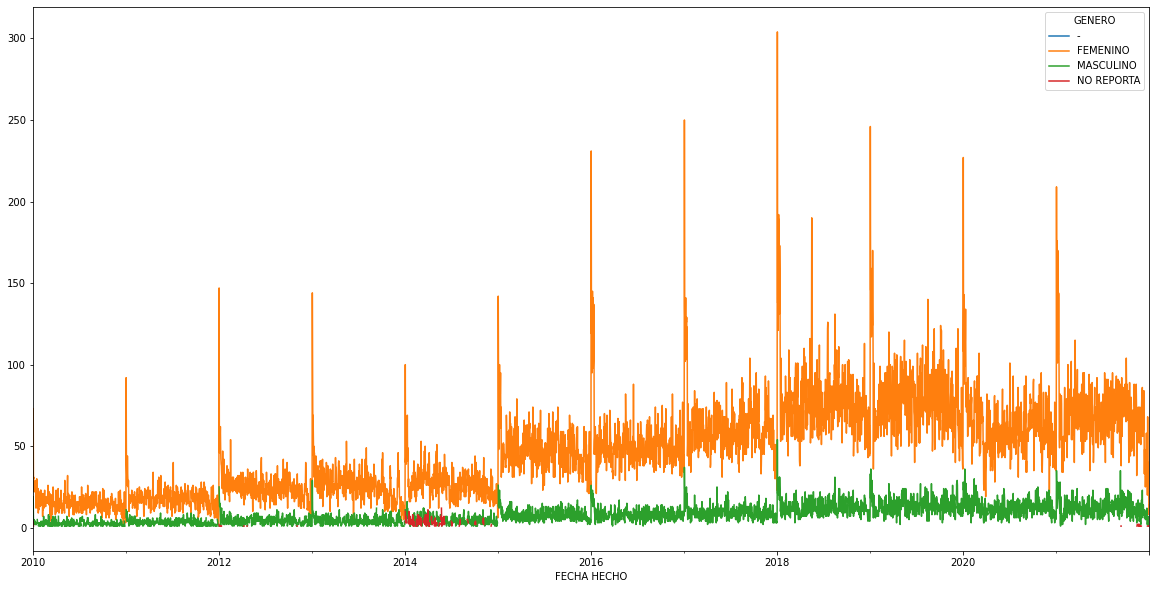

In [ ]:
import matplotlib.pyplot as plt

c.plot(figsize=(20,10));

# Punto 4
4.	¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

Para lograr resolver esta pregunta, primero separamos año y mes de la fecha de hecho.

In [ ]:
d = df
#d['FECHA HECHO'] = d['FECHA HECHO'].strftime('%Y-%m-%d')
d['AÑO'] = pd.DatetimeIndex(df['FECHA HECHO']).year
d['MES'] = pd.DatetimeIndex(df['FECHA HECHO']).month
d.tail()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,delito,AÑO,MES
252329,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-02-23,FEMENINO,MENORES,1,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,2021,2
252330,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-07-24,MASCULINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,2021,7
252331,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-01-09,FEMENINO,ADOLESCENTES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,2021,1
252332,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-09-14,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,2021,9
252333,VICHADA,SANTA ROSALÍA,99624000.0,SIN EMPLEO DE ARMAS,2021-09-12,FEMENINO,ADOLESCENTES,2,ARTÍCULO 206. ACTO SEXUAL VIOLENTO,2021,9


Una vez tenemos los datos podemos agruparlos por el mes y sumar la cantidad de delitos de cada uno
Una vez obtenidos los datos en un dataframe procedemos a graficarlos

MES
1     27468
2     19277
3     19836
4     19058
5     20935
6     18656
7     19997
8     21101
9     20095
10    20450
11    18063
12    16311
Name: CANTIDAD, dtype: int64


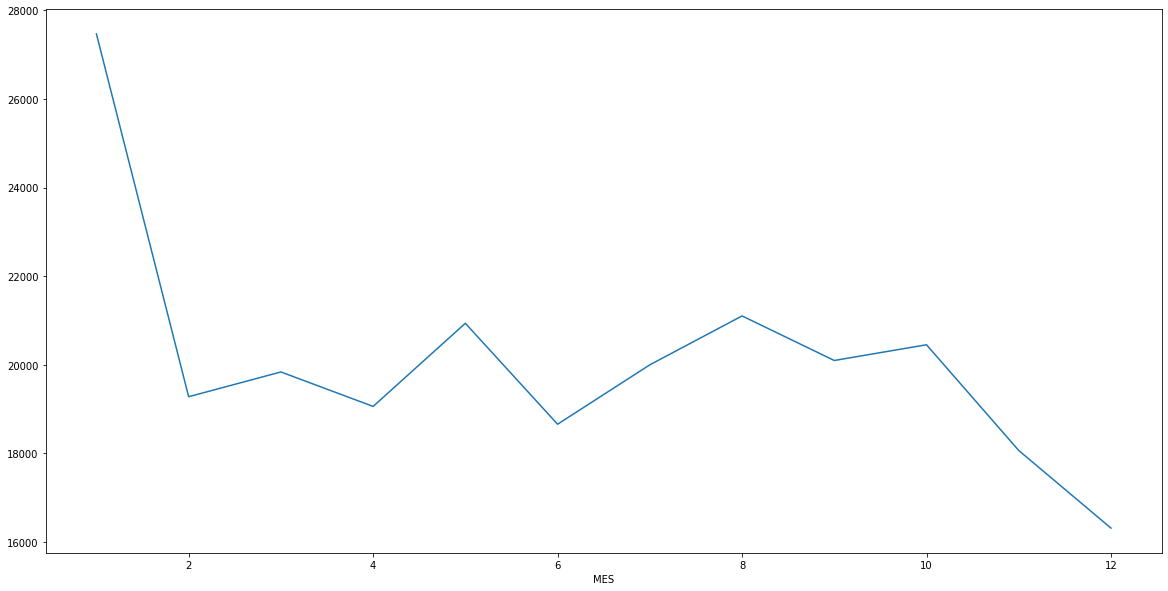

In [ ]:
d  = df.groupby(['MES'])['CANTIDAD'].sum()
print(d)
d.plot(figsize=(20,10))

# Punto 5
5.	Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son los delitos, descripciones o modalidades más comunes?

Para la solución de este punto se agrupo por la columna delito que lista cada uno de los delitos cometidos y sumamos la cantidad para así dar con el top de delitos de todos los tiempos

In [ ]:
e = df
e = e.groupby('delito', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
e

,delito,CANTIDAD
4,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,78657
3,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,54848
0,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,37590
